In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adamax

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


C:\Users\Josh\Anaconda3\envs\PythonData\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#facial data in csv format

raw_data_csv_file_name = "data/fer2013.csv"
raw_data = pd.read_csv(raw_data_csv_file_name)

In [3]:
#taking a look at the data

print(raw_data.count())
print(raw_data.head())

emotion    35887
pixels     35887
Usage      35887
dtype: int64
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


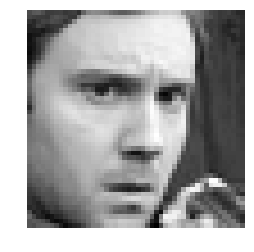

In [4]:
#taking a look at the image

img = raw_data["pixels"][0] #first image
val = img.split(" ")
x_pixels = np.array(val, 'float32')
x_pixels /= 255
x_reshaped = x_pixels.reshape(48, 48)


plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
#preprocessing data

images = raw_data["pixels"]

X_prepped = []

for image in images:
    img = image
    val = img.split(" ")
    x_pixels = np.array(val, 'float32')
    x_pixels /= 255
    x_reshaped = x_pixels.reshape(48, 48)
    X_prepped.append(x_reshaped)
    
y = raw_data['emotion']

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)

In [8]:
#split data for test/train

X_train, X_test, y_train, y_test = train_test_split(X_prepped, one_hot_y, random_state=1, stratify=one_hot_y)

In [9]:
#call vgg16

vgg16 = VGG16(include_top=False, input_shape=(48, 48, 3), weights='imagenet')

In [10]:
#build model with layers

model = Sequential()
model.add(Dense(256, input_shape=(512,), activation='relu'))
model.add(Dense(128, input_shape=(256,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, input_shape=(64,)))
model.add(Dense(7, activation='softmax'))

In [11]:
#compile model

adamax = Adamax()
model.compile(loss='categorical_crossentropy', optimizer=adamax, metrics=['accuracy'])

In [25]:
# model.fit(X_train, y_train, validation_data=(X_train, y_train), nb_epoch=1000, batch_size=1000)